In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# split between train and test
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Normalize images
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)


60000 train samples
10000 test samples


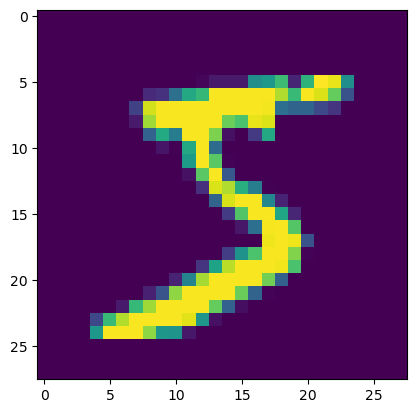

digit= 5


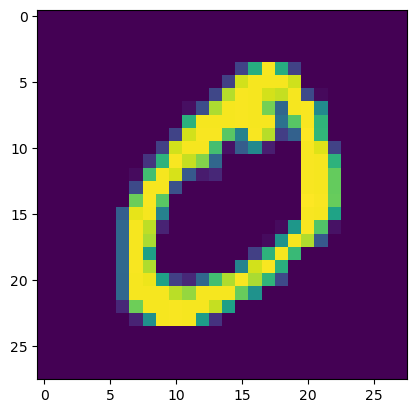

digit= 0


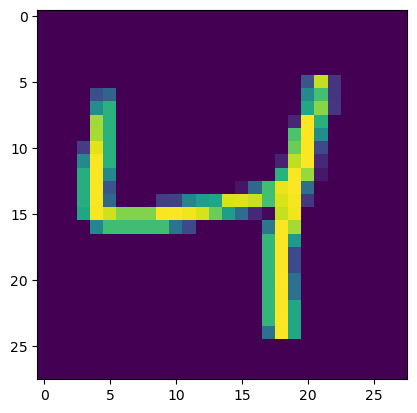

digit= 4


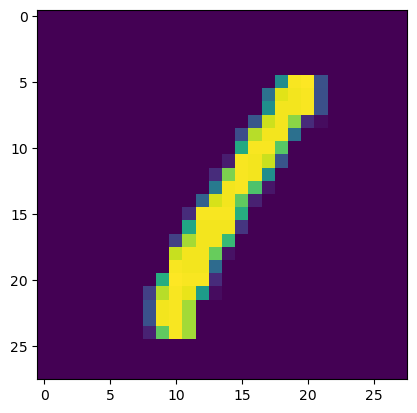

digit= 1


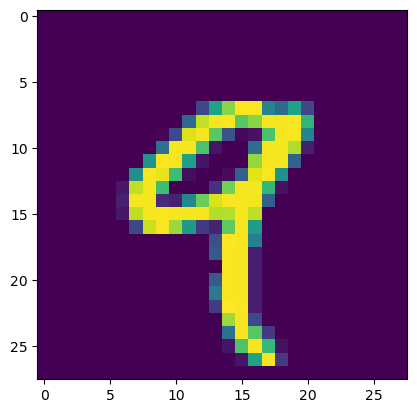

digit= 9


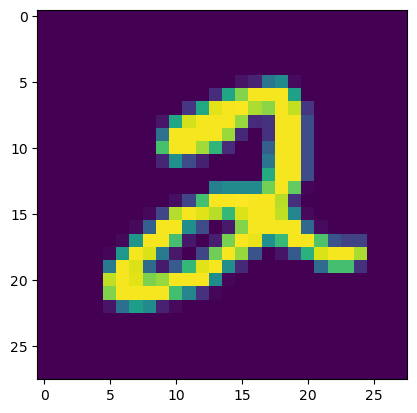

digit= 2


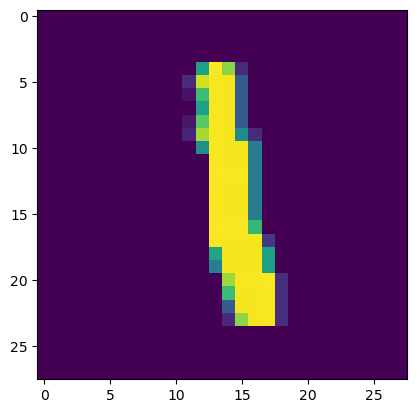

digit= 1


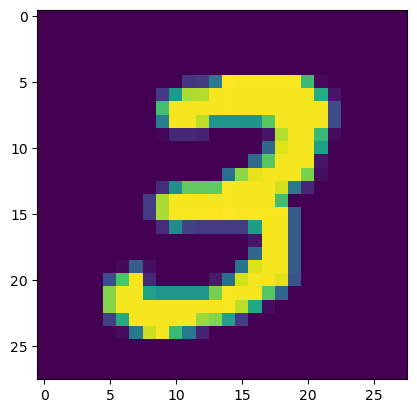

digit= 3


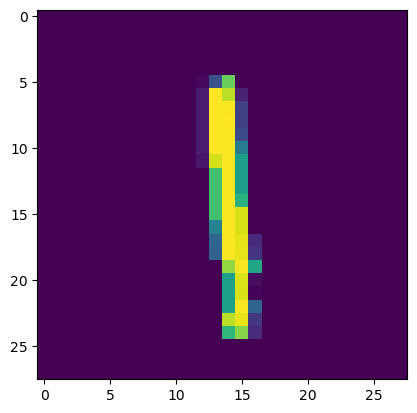

digit= 1


In [3]:
#check shapes
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

#show sample images
for i in range(0,9):
    plt.imshow(x_train[i])
    plt.show()
    print("digit=",y_train[i])


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#print("y_train:", y_train[9].shape)
#y_test = keras.utils.to_categorical(y_test, num_classes)

In [4]:
#build model
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        #layers.Dense(320, activation="relu"),
        #layers.Dense(128, activation="relu"),
        layers.Dense(num_classes, activation="softmax"),
    ]
)


In [5]:
#compile model
model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()
#optimizer="adam"

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 10)                54090     
                                                                 
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [6]:
#training
batch_size = 60
epochs = 3
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
#print(model.weights)

Epoch 1/3
900/900 [==============================] - 6s 6ms/step - loss: 0.2771 - accuracy: 0.9227 - val_loss: 0.1086 - val_accuracy: 0.9693
Epoch 2/3
900/900 [==============================] - 5s 6ms/step - loss: 0.1054 - accuracy: 0.9696 - val_loss: 0.0787 - val_accuracy: 0.9790
Epoch 3/3
900/900 [==============================] - 5s 6ms/step - loss: 0.0769 - accuracy: 0.9779 - val_loss: 0.0706 - val_accuracy: 0.9812


In [7]:
#evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.0663420706987381
Test accuracy: 0.9793000221252441


313/313 [==============================] - 1s 2ms/step


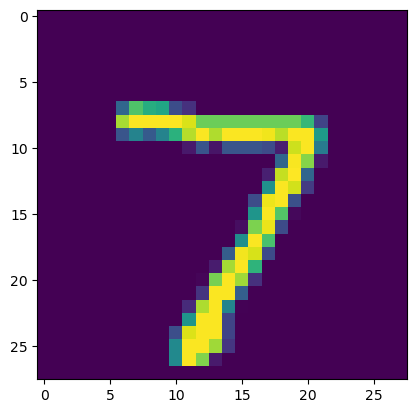

digit= 7
predicted digit= 7


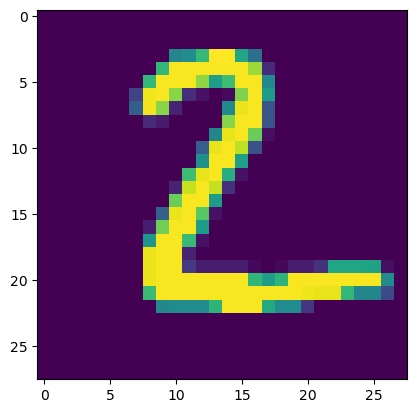

digit= 2
predicted digit= 2


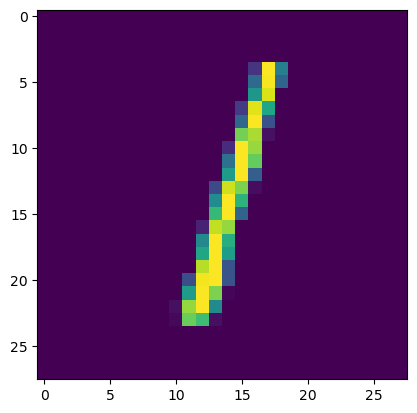

digit= 1
predicted digit= 1


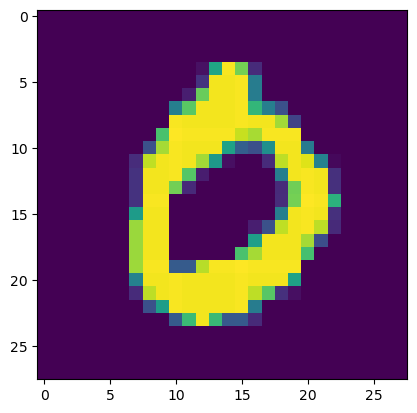

digit= 0
predicted digit= 0


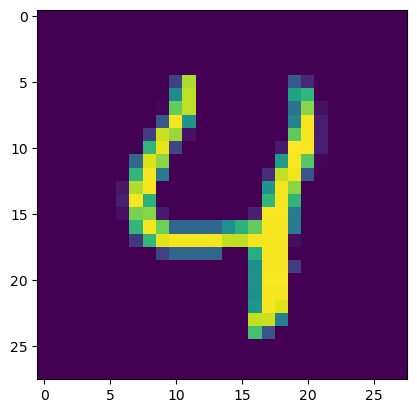

digit= 4
predicted digit= 4


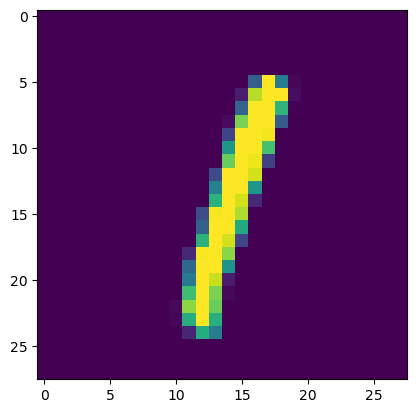

digit= 1
predicted digit= 1


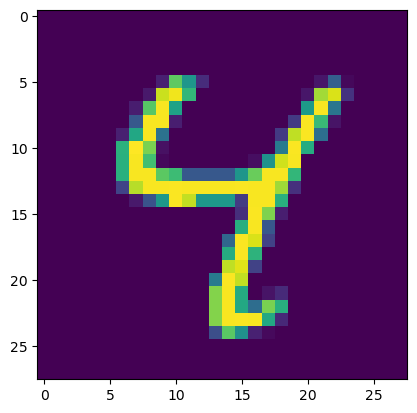

digit= 4
predicted digit= 4


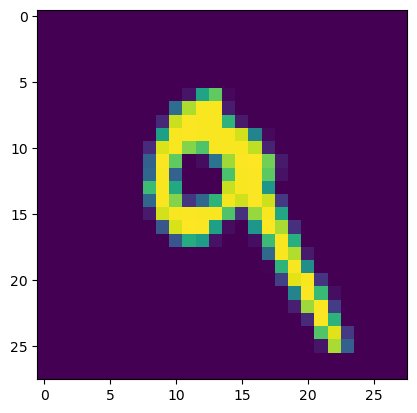

digit= 9
predicted digit= 9


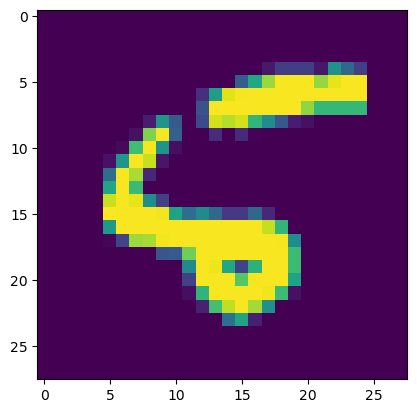

digit= 5
predicted digit= 6


In [8]:
#check samples
y_pred = model.predict(x_test)
for i in range(0,9):
    plt.imshow(x_test[i])
    plt.show()
    print("digit=",y_test[i])
    print("predicted digit=",np.argmax(y_pred[i]))

In [ ]:
model = keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

In [12]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 30, 30, 40)        1120      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 40)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 13, 13, 64)        23104     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             